<a href="https://colab.research.google.com/github/matiasfeliu92/barrios_populares/blob/master/barrios_populares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://datos.gob.ar/dataset/desarrollo-social-registro-nacional-barrios-populares

In [26]:
ruta_archivo_drive = '/content/drive/MyDrive/archivos_csv/20231205_info_publica_datos_barrios.csv'
barrios_populares = pd.read_csv(ruta_archivo_drive)

In [27]:
for col in barrios_populares.columns:
  if 'id_renabap' in col:
    barrios_populares.drop(col, axis=1, inplace=True)

In [28]:
barrios_populares.head()

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,decada_de_creacion,anio_de_creacion,energia_electrica,efluentes_cloacales,agua_corriente,cocina,calefaccion,titulo_propiedad,clasificacion_barrio,superficie_m2
0,Monterrey I,Buenos Aires,Pilar,Presidente Derqui,40,44,Década 1990,NaN,Conexión regular a la red con medidor prepago,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,11674
1,Malvinas II,Buenos Aires,La Plata,José Melchor Romero,290,319,Década 1990,NaN,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Conexión irregular a la red de agua,Gas en garrafa,Leña o carbón,NO,Asentamiento,98093
2,Ferroviario,Buenos Aires,La Plata,Angel Etcheverry,133,146,Década 2000,NaN,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión formal a la red de agua con factura,Gas en garrafa,Leña o carbón,NO,Asentamiento,75887
3,La Favelita,Buenos Aires,La Plata,Tolosa,122,134,Década 1970,NaN,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Energía eléctrica,NO,Asentamiento,36889
4,Casaca,Buenos Aires,La Plata,City Bell,20,22,Década 2000,NaN,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,25768


In [29]:
print(f"This dataset has {barrios_populares.shape[0]} rows and {barrios_populares.shape[1]} columns")

This dataset has 6467 rows and 16 columns


In [30]:
barrios_populares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nombre_barrio                   6467 non-null   object 
 1   provincia                       6467 non-null   object 
 2   departamento                    6467 non-null   object 
 3   localidad                       6467 non-null   object 
 4   cantidad_viviendas_aproximadas  6467 non-null   int64  
 5   cantidad_familias_aproximada    6467 non-null   int64  
 6   decada_de_creacion              6467 non-null   object 
 7   anio_de_creacion                1688 non-null   float64
 8   energia_electrica               6467 non-null   object 
 9   efluentes_cloacales             6467 non-null   object 
 10  agua_corriente                  6467 non-null   object 
 11  cocina                          6467 non-null   object 
 12  calefaccion                     64

**nombre_barrio**: El nombre del barrio.

**provincia**: La provincia en la que se encuentra el barrio.

**departamento**: El departamento (división administrativa) donde se ubica el barrio.

**localidad**: La localidad específica dentro del departamento.

**cantidad_viviendas_aproximadas**: El número aproximado de viviendas en el barrio.

**cantidad_familias_aproximada**: El número aproximado de familias que residen en el barrio.

**decada_de_creacion**: La década en la que se creó el barrio.

**anio_de_creacion**: El año específico de creación del barrio. Esta columna contiene muchos valores nulos.

**energia_electrica**: Indica si el barrio tiene acceso a energía eléctrica.

**efluentes_cloacales**: Indica si el barrio tiene acceso a un sistema de efluentes cloacales (alcantarillado).

**agua_corriente**: Indica si el barrio tiene acceso a agua corriente.

**cocina**: Indica el tipo de cocina disponible en las viviendas del barrio.

**calefaccion**: Indica el tipo de calefacción disponible en las viviendas del barrio.

**titulo_propiedad**: Indica el estado del título de propiedad de las viviendas en el barrio.

**clasificacion_barrio**: Clasificación del barrio, que puede referirse a características socioeconómicas o administrativas.

**superficie_m2**: La superficie total del barrio en metros cuadrados.

# Analisis descriptivo

### ¿Cual es la provincia que posee mas barrios populares?

<ipython-input-31-59c69003b48d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=barrios_populares,


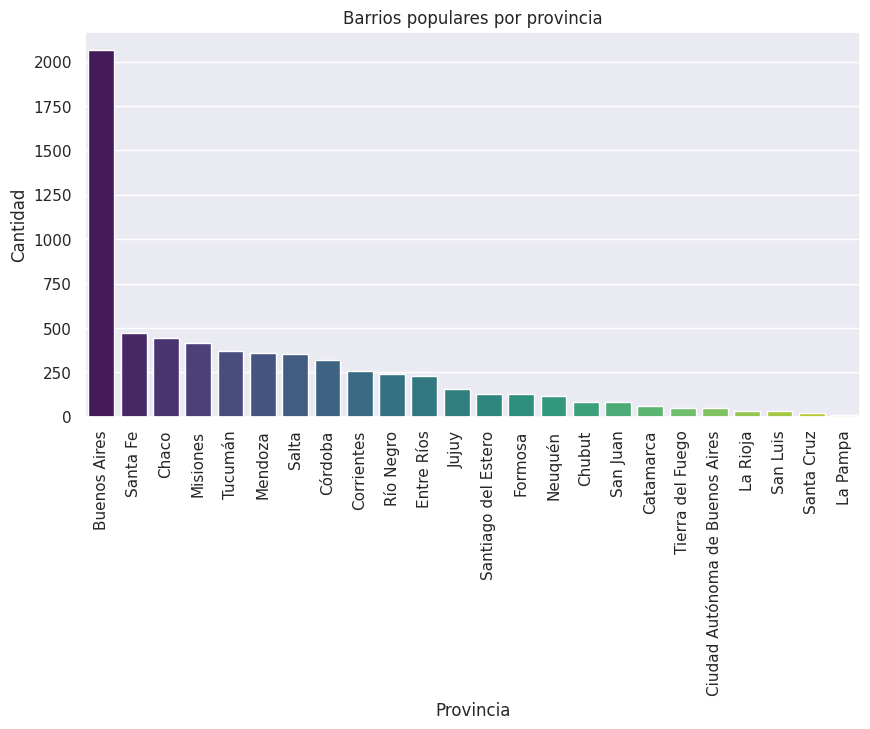

In [31]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = sns.countplot(data=barrios_populares,
              order=barrios_populares['provincia'].value_counts().index,
              palette="viridis",
              x='provincia')
plt.title('Barrios populares por provincia')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

podemos observar claramente en el grafico, que Buenos Aires es la provincia que posee mas barrios populares, es decir con mas situaciones criticas de habitat, en relacion al resto del pais.

<ipython-input-32-6dc5a8705a48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=barrios_populares[barrios_populares.provincia == 'Buenos Aires'],


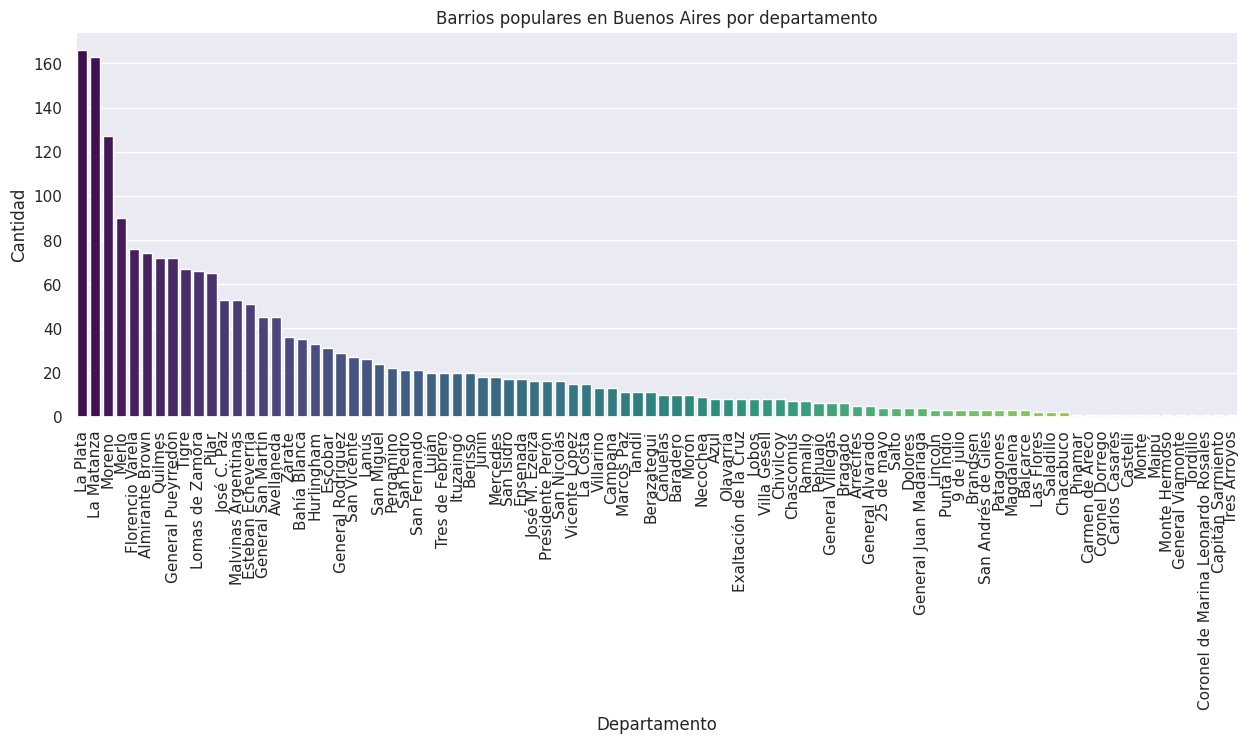

In [32]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
ax = sns.countplot(data=barrios_populares[barrios_populares.provincia == 'Buenos Aires'],
              order=barrios_populares[barrios_populares.provincia == 'Buenos Aires']['departamento'].value_counts().index,
              palette="viridis",
              x='departamento')
plt.title('Barrios populares en Buenos Aires por departamento')
plt.xticks(rotation=90)
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

Si tomamos solamente provincia de Buenos Aires y realizamos el conteo de barrios por municipio/departamento, podemos observar que La Plata y La Matanza son los municipios mas afectados por los barrios populares

<ipython-input-33-7e0ee4ef1deb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=barrios_populares,


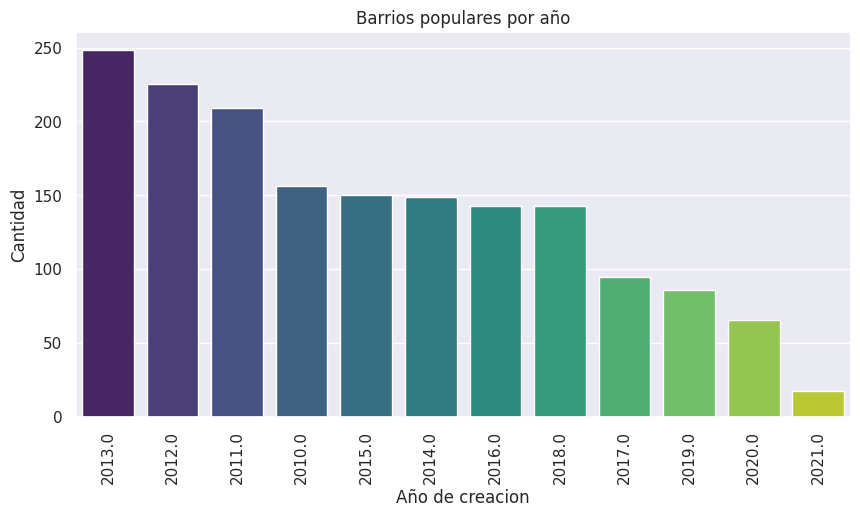

In [33]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = sns.countplot(data=barrios_populares,
              order=barrios_populares['anio_de_creacion'].value_counts().index,
              palette="viridis",
              x='anio_de_creacion')
plt.title('Barrios populares por año')
plt.xticks(rotation=90)
plt.xlabel('Año de creacion')
plt.ylabel('Cantidad')
plt.show()

### ¿Como es la relacion entre la cantidad de viviendas y la cantidad de familias?

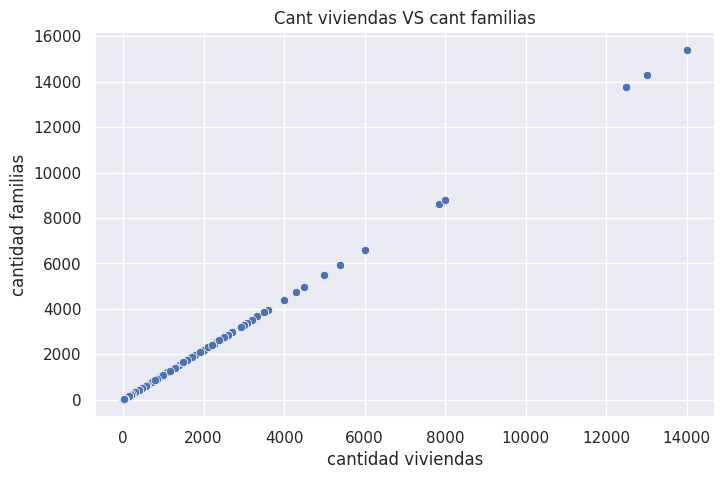

In [34]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.scatterplot(data=barrios_populares, x='cantidad_viviendas_aproximadas', y='cantidad_familias_aproximada')
plt.title('Cant viviendas VS cant familias')
plt.xlabel('cantidad viviendas')
plt.ylabel('cantidad familias')
plt.show()

podemos observar claramente que la cantidad de viviendas esta fuertemente relacionada con la cantidad de familias, es decir a mayor cantidad de familias, mayor cantidad de viviendas

In [35]:
print({'anio_de_creacion': barrios_populares.anio_de_creacion.unique()})
print({'anio_de_creacion': barrios_populares.decada_de_creacion.unique()})
print({'energia_electrica': barrios_populares.energia_electrica.unique()})
print({'efluentes_cloacales': barrios_populares.efluentes_cloacales.unique()})
print({'agua_corriente': barrios_populares.agua_corriente.unique()})
print({'cocina': barrios_populares.cocina.unique()})
print({'calefaccion': barrios_populares.calefaccion.unique()})

print({'clasificacion_barrio': barrios_populares.clasificacion_barrio.unique()})
print({'titulo_propiedad': barrios_populares.titulo_propiedad.unique()})

{'anio_de_creacion': array([  nan, 2014., 2011., 2013., 2012., 2010., 2015., 2016., 2017.,
       2018., 2020., 2019., 2021.])}
{'anio_de_creacion': array(['Década 1990', 'Década 2000', 'Década 1970', 'Década 1980',
       'Década 1960', 'Década 1950', 'Década 2010', 'Década 1940',
       'Década 1930', 'Década 1920', 'Década 1910', 'Década 1900',
       'Década 2020'], dtype=object)}
{'energia_electrica': array(['Conexión regular a la red con medidor prepago',
       'Conexión irregular a la red',
       'Conexión formal a la red con medidor domiciliario con factura',
       'Conexión a la red con medidor comunitario',
       'Conexión regular a la red con medidor domiciliario con consumo limitado',
       'No tiene conexión eléctrica', 'Energía solar',
       'Generador eléctrico a combustión',
       'Conexión a la red con medidor compartido',
       'Conexión regular a la red con medidor domiciliario pero sin factura'],
      dtype=object)}
{'efluentes_cloacales': array(['Desagüe a

### ¿Como es la relacion entre el tipo de barrio segun la clasificacion y la cantidad de viviendas/familias?

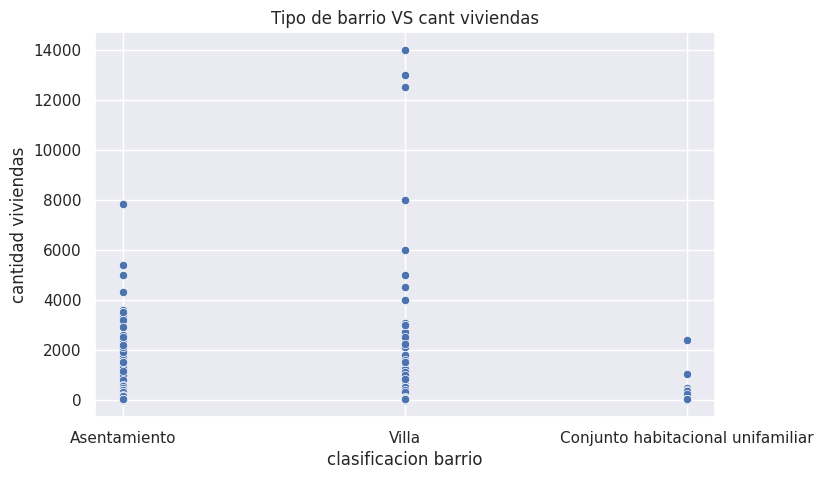

In [36]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.scatterplot(data=barrios_populares, x='clasificacion_barrio', y='cantidad_viviendas_aproximadas')
plt.title('Tipo de barrio VS cant viviendas')
plt.xlabel('clasificacion barrio')
plt.ylabel('cantidad viviendas')
plt.show()

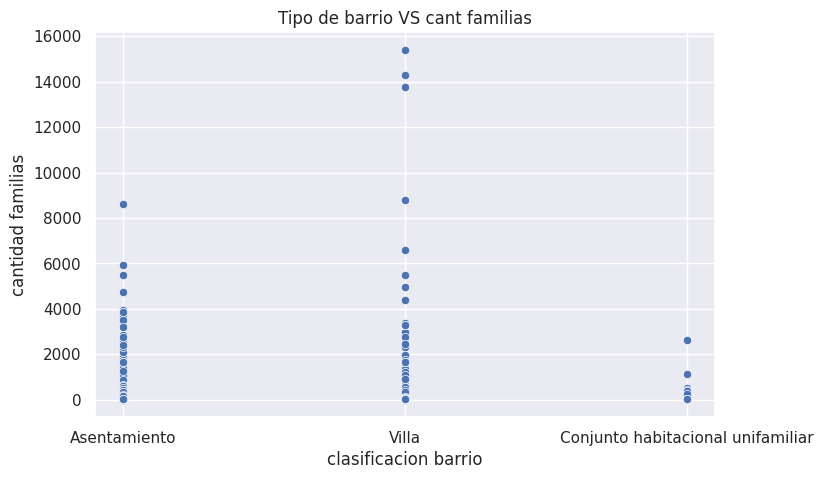

In [37]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.scatterplot(data=barrios_populares, x='clasificacion_barrio', y='cantidad_familias_aproximada')
plt.title('Tipo de barrio VS cant familias')
plt.xlabel('clasificacion barrio')
plt.ylabel('cantidad familias')
plt.show()

En ambos graficos, podemos observar, que las villas poseen mas viviendas y por consiguiente mas concentracion de familias, en relacion a los asentamientos y a los conjuntos habitacionales

### ¿Como es la relacion entre la superficie del barrio y la cantidad de viviendas/familias y el tipo de barrio?

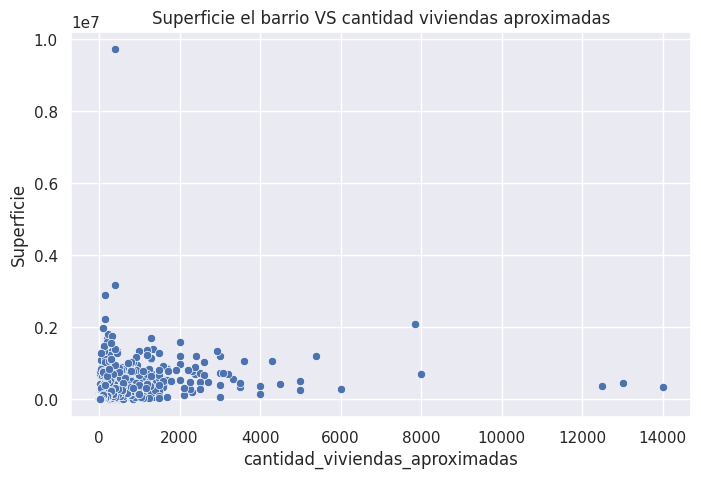

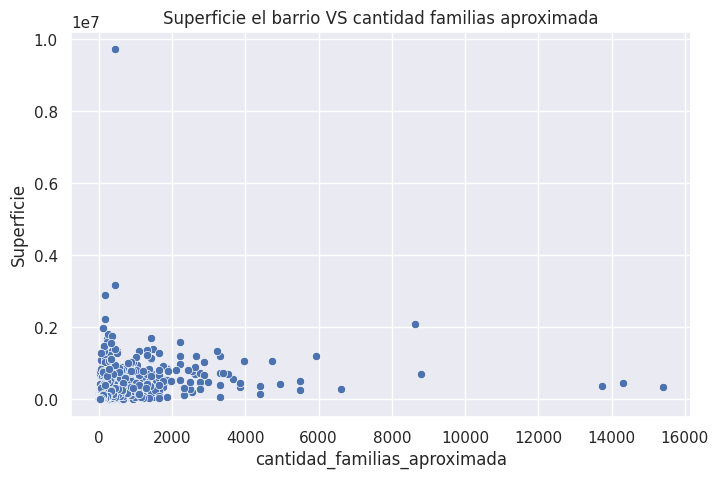

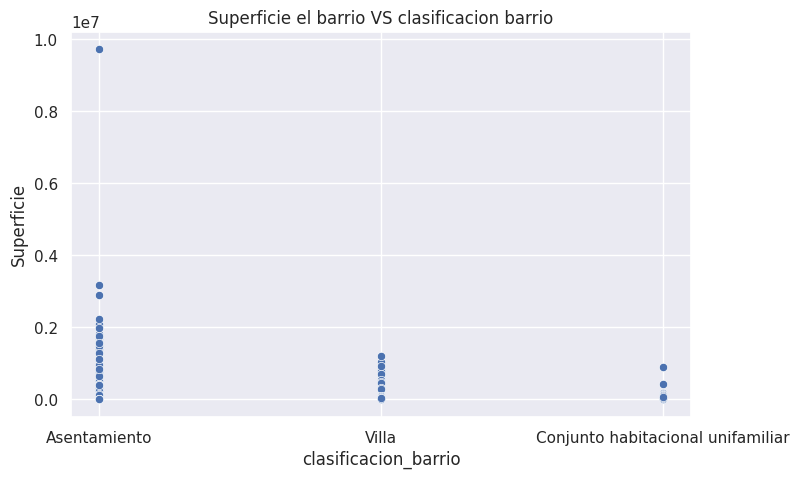

In [38]:
for col in ["cantidad_viviendas_aproximadas", "cantidad_familias_aproximada", "clasificacion_barrio"]:
  plt.figure(figsize=(8,5))
  sns.set_style("darkgrid")
  sns.scatterplot(data=barrios_populares, y='superficie_m2', x=col)
  plt.title(f'Superficie el barrio VS {col.replace("_", " ")}')
  plt.ylabel(f'{col.replace("_", " ")}')
  plt.ylabel('Superficie')
  plt.show()
  print("                ")

In [39]:
barrios_populares.describe()

,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,anio_de_creacion,superficie_m2
count,6467.000000,6467.000000,1688.000000,6.467000e+03
mean,173.928715,191.401732,2014.175355,1.057990e+05
std,450.216876,495.223841,2.956521,2.162298e+05
min,5.000000,6.000000,2010.000000,3.680000e+02
25%,30.000000,33.000000,2012.000000,1.838500e+04
50%,70.000000,77.000000,2014.000000,4.644500e+04
75%,167.000000,184.000000,2016.000000,1.097270e+05
max,14000.000000,15400.000000,2021.000000,9.715558e+06


#### Revisamos valores nulos

In [40]:
sum_nulls = barrios_populares.isnull().sum().sort_values(ascending=False)
nulls_percentage = (barrios_populares.isnull().sum()/barrios_populares.isnull().count()).sort_values(ascending=False)
barrios_nulls = pd.concat([sum_nulls, nulls_percentage], axis=1, keys=['Total', 'Percentage'])
barrios_nulls[barrios_nulls.Total != 0]

,Total,Percentage
anio_de_creacion,4779,0.738983


La unica columna que cuenta con valores nulos es la de **anio_de_creacion**. Para reemplazar esos valores faltantes, lo que hacemos es, tomando la columna **decada_de_creacion**, extraemos el año y le sumamos 5 años mas, por ejemplo, si es la decada del 2000, podemos sumarle 5 y reemplazar los valores de anio_de_creacion por 2005

In [42]:
def replace_missing_creation_year(row):
  decada_de_creacion = row['decada_de_creacion']
  anio_de_creacion = row['anio_de_creacion']
  if pd.isna(anio_de_creacion):
    anio = decada_de_creacion.split(" ")[1]
    return int(anio)+5
  else:
    return anio_de_creacion

In [43]:
barrios_populares['anio_de_creacion'] = barrios_populares.apply(replace_missing_creation_year, axis=1)

In [44]:
barrios_populares.isnull().sum()

nombre_barrio                     0
provincia                         0
departamento                      0
localidad                         0
cantidad_viviendas_aproximadas    0
cantidad_familias_aproximada      0
decada_de_creacion                0
anio_de_creacion                  0
energia_electrica                 0
efluentes_cloacales               0
agua_corriente                    0
cocina                            0
calefaccion                       0
titulo_propiedad                  0
clasificacion_barrio              0
superficie_m2                     0
dtype: int64

In [45]:
def generate_histogram_boxplot(col_, df):
  col = f'{col_}'
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
  fig.tight_layout(pad=4.0)
  sns.set(style='whitegrid')
  sns.histplot(df[col_], ax=axs[0], kde=True, bins=50, alpha=0.7)
  median_value = df[col_].median()
  mean_value = df[col_].mean()
  mode_value = df[col_].mode().iloc[0]
  axs[0].axvline(median_value, color='r', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')
  axs[0].axvline(mean_value, color='g', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
  axs[0].axvline(mode_value, color='b', linestyle='dashed', linewidth=2, label=f'Moda: {mode_value:.2f}')
  axs[0].set_title(f'Histograma de {col_}')
  axs[0].legend()

  sns.boxplot(x=df[col_], ax=axs[1])
  axs[1].set_title(f'Boxplot de {col_}')
  plt.show()

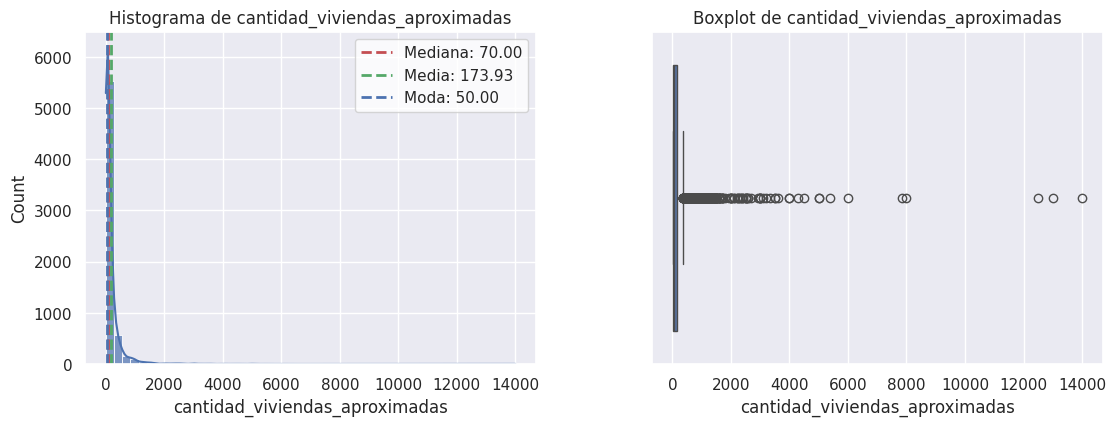

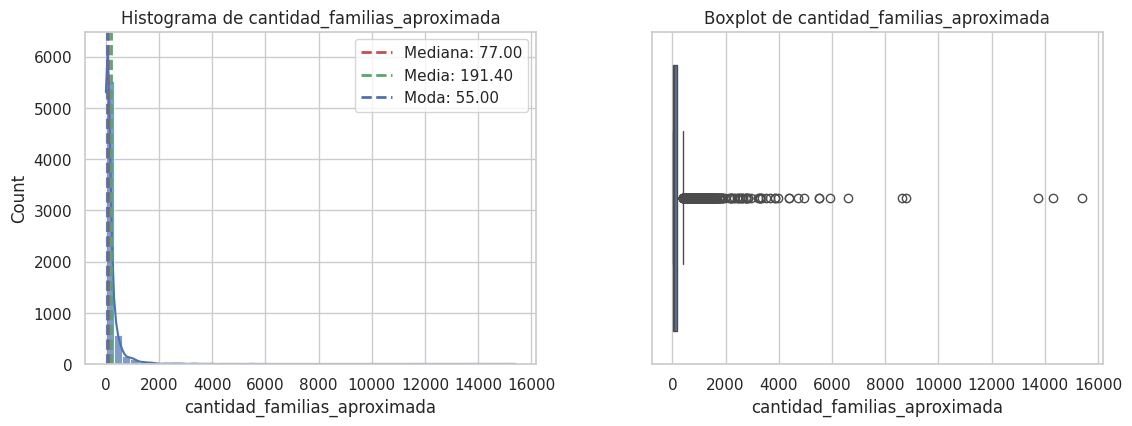

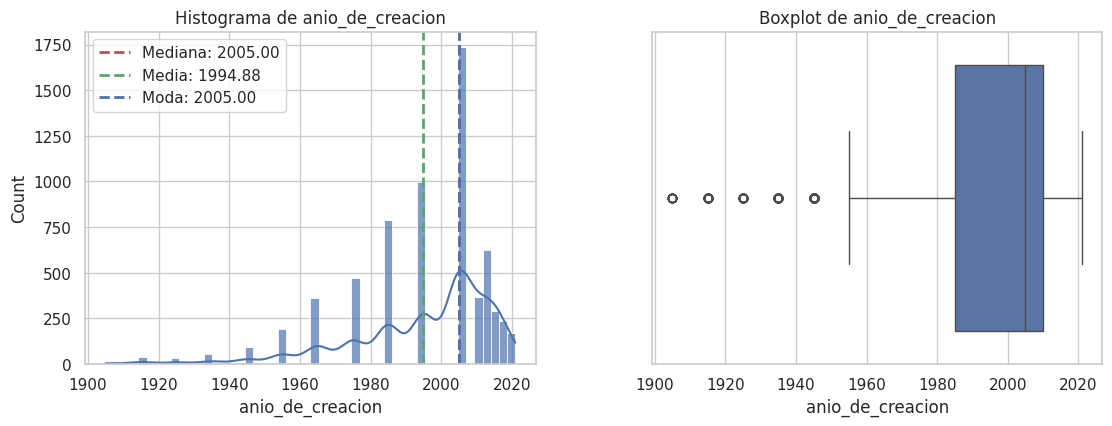

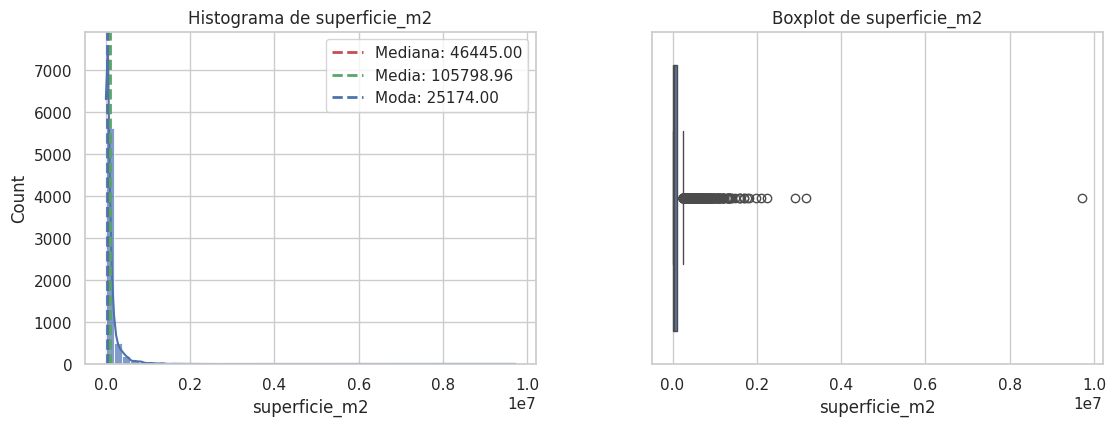

In [46]:
for col in barrios_populares.select_dtypes(include=['int64', 'float64']).columns:
    generate_histogram_boxplot(col, barrios_populares)

In [47]:
barrios_populares[(barrios_populares.cantidad_familias_aproximada < 50) & (barrios_populares.cantidad_viviendas_aproximadas < 50)]

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,decada_de_creacion,anio_de_creacion,energia_electrica,efluentes_cloacales,agua_corriente,cocina,calefaccion,titulo_propiedad,clasificacion_barrio,superficie_m2
0,Monterrey I,Buenos Aires,Pilar,Presidente Derqui,40,44,Década 1990,1995.0,Conexión regular a la red con medidor prepago,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,11674
4,Casaca,Buenos Aires,La Plata,City Bell,20,22,Década 2000,2005.0,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,25768
5,La Güemes,Buenos Aires,La Plata,Manuel B. Gonnet,12,13,Década 1970,1975.0,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Energía eléctrica,NO,Asentamiento,3424
6,8 y 489,Buenos Aires,La Plata,Manuel B. Gonnet,23,25,Década 1980,1985.0,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,12698
15,Vieja Estación,Buenos Aires,La Plata,José Melchor Romero,30,33,Década 1960,1965.0,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Conexión irregular a la red de agua,Gas en garrafa,Energía eléctrica,NO,Asentamiento,30192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,La Esperanza,Tucumán,Tafí Viejo,Las Talitas,17,19,Década 1990,1995.0,Conexión a la red con medidor compartido,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Energía eléctrica,NO,Asentamiento,10737
6459,El Puente,Tucumán,Tafí Viejo,Los Nogales,14,15,Década 1970,1975.0,Conexión a la red con medidor compartido,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Leña o carbón,NO,Asentamiento,16523
6463,Pacará Pintado,Tucumán,Cruz Alta,San Andrés,20,22,Década 2000,2005.0,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo comunitaria,Gas en garrafa,Leña o carbón,NO,Asentamiento,12196
6465,Ampliación 130 viviendas,Tucumán,Capital,San Miguel De Tucumán,19,21,Década 2010,2014.0,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Gas en garrafa,NO,Asentamiento,13992


In [48]:
def filter_outliers(df, column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  print({'column': column_name, 'lower_bound': lower_bound, 'upper_bound': upper_bound})
  df_upper_percentile_75 = df[df[column_name] >= upper_bound]
  df_lower_percentile_25 = df[df[column_name] <= lower_bound]
  df_without_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
  return df_without_outliers, df_upper_percentile_75, df_lower_percentile_25

In [49]:
for col in barrios_populares.select_dtypes(include=['int64', 'float64']).columns:
  filter_outliers(barrios_populares, col)

{'column': 'cantidad_viviendas_aproximadas', 'lower_bound': -175.5, 'upper_bound': 372.5}
{'column': 'cantidad_familias_aproximada', 'lower_bound': -193.5, 'upper_bound': 410.5}
{'column': 'anio_de_creacion', 'lower_bound': 1947.5, 'upper_bound': 2047.5}
{'column': 'superficie_m2', 'lower_bound': -118628.0, 'upper_bound': 246740.0}
